<a href="https://colab.research.google.com/github/ElisabethShah/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/'
                          'ddf--gapminder--systema_globalis/master/'
                          'ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/'
                         'ddf--gapminder--systema_globalis/master/'
                         'ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/'
                                 'ddf--gapminder--systema_globalis/master/'
                                 'ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [0]:
# Additional imports.

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Check and preview cell phones dataframe.

In [67]:
cell_phones.shape

(9215, 3)

In [68]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [69]:
cell_phones.describe()

,time,cell_phones_total
count,9215.000000,9.215000e+03
mean,1994.051329,8.403239e+06
std,14.255242,5.385699e+07
min,1960.000000,0.000000e+00
25%,1983.000000,0.000000e+00
50%,1995.000000,4.915000e+03
75%,2006.000000,1.260722e+06
max,2017.000000,1.474097e+09


#### Check and preview population dataframe.

In [70]:
population.shape

(59297, 3)

In [71]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [72]:
population.describe(include='all')

,geo,time,population_total
count,59297,59297.000000,5.929700e+04
unique,197,NaN,NaN
top,arg,NaN,NaN
freq,301,NaN,NaN
mean,NaN,1950.000000,2.311645e+07
std,NaN,86.891469,1.000223e+08
min,NaN,1800.000000,6.420000e+02
25%,NaN,1875.000000,4.424030e+05
50%,NaN,1950.000000,2.599582e+06
75%,NaN,2025.000000,1.088200e+07


#### Check and preview country dataframe.

In [73]:
geo_country_codes.shape

(273, 33)

In [74]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [75]:
geo_country_codes.describe()

,iso3166_1_numeric,latitude,longitude
count,247.000000,241.000000,241.000000
mean,434.129555,17.479435,14.291928
std,253.682663,25.920565,74.250901
min,4.000000,-90.000000,-176.200000
25%,216.000000,1.289670,-40.000000
50%,434.000000,16.750000,17.833330
75%,653.000000,39.694500,48.000000
max,894.000000,78.000000,179.144780


### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [76]:
# Join dataframes and check shape of result.

merged = pd.merge(cell_phones, population, on=['geo','time'], how='inner')
merged.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [77]:
# Join dataframes and check shape of result.

merged = pd.merge(merged, geo_country_codes[['geo','country']], 
                  on='geo', how='inner')
merged.shape

(8590, 5)

***Optional bonus for Part 1: Take initiative to join more data.***

In [78]:
# Add region info to dataframe; confirm no rows lost.

merged = pd.merge(merged, geo_country_codes[['geo', 'world_6region']], 
                  on='geo', how='inner')
merged.shape

(8590, 6)

In [79]:
# Preview data.
merged.head()

,geo,time,cell_phones_total,population_total,country,world_6region
0,afg,1960,0.0,8996351,Afghanistan,south_asia
1,afg,1965,0.0,9938414,Afghanistan,south_asia
2,afg,1970,0.0,11126123,Afghanistan,south_asia
3,afg,1975,0.0,12590286,Afghanistan,south_asia
4,afg,1976,0.0,12840299,Afghanistan,south_asia


In [80]:
# Import data on broadband subscribers by country and year; check shape.
broadband = pd.read_csv('https://raw.githubusercontent.com/open-numbers/'
                        'ddf--gapminder--systema_globalis/master/'
                        'ddf--datapoints--broadband_subscribers--by--geo--time.csv')
broadband.shape

(2986, 3)

In [81]:
# Check and preview imported broadband data.
broadband.head()

,geo,time,broadband_subscribers
0,abw,2003,1399.0
1,abw,2004,6963.0
2,abw,2005,12274.0
3,abw,2006,13953.0
4,abw,2007,15996.0


In [82]:
# Add broadband info to main dataframe, where available; confirm no rows lost.
merged = pd.merge(merged, broadband, on=['geo', 'time'], how='left')
merged.shape

(8590, 7)

In [83]:
# Preview data.
merged.head()

,geo,time,cell_phones_total,population_total,country,world_6region,broadband_subscribers
0,afg,1960,0.0,8996351,Afghanistan,south_asia,NaN
1,afg,1965,0.0,9938414,Afghanistan,south_asia,NaN
2,afg,1970,0.0,11126123,Afghanistan,south_asia,NaN
3,afg,1975,0.0,12590286,Afghanistan,south_asia,NaN
4,afg,1976,0.0,12840299,Afghanistan,south_asia,NaN


In [84]:
# Preview data for years where broadband subscription numbers are more likely 
# to be available.
merged.tail()

,geo,time,cell_phones_total,population_total,country,world_6region,broadband_subscribers
8585,zwe,2013,13633167.0,15054506,Zimbabwe,sub_saharan_africa,103916.0
8586,zwe,2014,11798652.0,15411675,Zimbabwe,sub_saharan_africa,152234.0
8587,zwe,2015,12757410.0,15777451,Zimbabwe,sub_saharan_africa,163987.0
8588,zwe,2016,12878926.0,16150362,Zimbabwe,sub_saharan_africa,170838.0
8589,zwe,2017,14092104.0,16529904,Zimbabwe,sub_saharan_africa,187310.0


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [85]:
# Calculate and add cell phones per person column. Verify.

merged['cell_phones_per_capita'] = merged['cell_phones_total'] / merged['population_total']
merged.head()

,geo,time,cell_phones_total,population_total,country,world_6region,broadband_subscribers,cell_phones_per_capita
0,afg,1960,0.0,8996351,Afghanistan,south_asia,NaN,0.0
1,afg,1965,0.0,9938414,Afghanistan,south_asia,NaN,0.0
2,afg,1970,0.0,11126123,Afghanistan,south_asia,NaN,0.0
3,afg,1975,0.0,12590286,Afghanistan,south_asia,NaN,0.0
4,afg,1976,0.0,12840299,Afghanistan,south_asia,NaN,0.0


In [86]:
# Verify 1.220 cell phones per person in the U.S. in 2017.

merged.loc[(merged['geo'] == 'usa') & (merged['time'] == 2017)]

,geo,time,cell_phones_total,population_total,country,world_6region,broadband_subscribers,cell_phones_per_capita
8134,usa,2017,395881000.0,324459463,United States,america,109838000.0,1.220125


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [87]:
# Capitalize and verify country code column.

merged['geo'] = merged['geo'].str.upper()
merged.head()

,geo,time,cell_phones_total,population_total,country,world_6region,broadband_subscribers,cell_phones_per_capita
0,AFG,1960,0.0,8996351,Afghanistan,south_asia,NaN,0.0
1,AFG,1965,0.0,9938414,Afghanistan,south_asia,NaN,0.0
2,AFG,1970,0.0,11126123,Afghanistan,south_asia,NaN,0.0
3,AFG,1975,0.0,12590286,Afghanistan,south_asia,NaN,0.0
4,AFG,1976,0.0,12840299,Afghanistan,south_asia,NaN,0.0


***Optional bonus for Part 2: Take initiative to make more features.***

In [88]:
# Calculate and add broadband subscriptions per person column. Verify.

merged['broadband_per_capita'] = merged['broadband_subscribers'] / merged['population_total']
merged.head()

,geo,time,cell_phones_total,population_total,country,world_6region,broadband_subscribers,cell_phones_per_capita,broadband_per_capita
0,AFG,1960,0.0,8996351,Afghanistan,south_asia,NaN,0.0,NaN
1,AFG,1965,0.0,9938414,Afghanistan,south_asia,NaN,0.0,NaN
2,AFG,1970,0.0,11126123,Afghanistan,south_asia,NaN,0.0,NaN
3,AFG,1975,0.0,12590286,Afghanistan,south_asia,NaN,0.0,NaN
4,AFG,1976,0.0,12840299,Afghanistan,south_asia,NaN,0.0,NaN


In [89]:
# Check also for column data where numeric values available for calculation.

merged.tail()

,geo,time,cell_phones_total,population_total,country,world_6region,broadband_subscribers,cell_phones_per_capita,broadband_per_capita
8585,ZWE,2013,13633167.0,15054506,Zimbabwe,sub_saharan_africa,103916.0,0.905587,0.006903
8586,ZWE,2014,11798652.0,15411675,Zimbabwe,sub_saharan_africa,152234.0,0.765566,0.009878
8587,ZWE,2015,12757410.0,15777451,Zimbabwe,sub_saharan_africa,163987.0,0.808585,0.010394
8588,ZWE,2016,12878926.0,16150362,Zimbabwe,sub_saharan_africa,170838.0,0.797439,0.010578
8589,ZWE,2017,14092104.0,16529904,Zimbabwe,sub_saharan_africa,187310.0,0.852522,0.011332


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [90]:
# Summary statistics for numeric columns.

merged.describe()

,time,cell_phones_total,population_total,broadband_subscribers,cell_phones_per_capita,broadband_per_capita
count,8590.000000,8.590000e+03,8.590000e+03,2.815000e+03,8590.000000,2815.000000
mean,1994.193481,9.004950e+06,2.983823e+07,2.838014e+06,0.279639,0.083836
std,14.257975,5.573408e+07,1.161284e+08,1.512638e+07,0.454247,0.113120
min,1960.000000,0.000000e+00,4.433000e+03,0.000000e+00,0.000000,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,7.460500e+03,0.000000,0.001703
50%,1995.000000,6.200000e+03,5.725062e+06,8.101800e+04,0.001564,0.024723
75%,2006.000000,1.697652e+06,1.810581e+07,1.052690e+06,0.461149,0.131572
max,2017.000000,1.474097e+09,1.409517e+09,3.785400e+08,2.490243,0.497687


In [93]:
# Summary statistics for string columns.

merged.describe(include=np.object)

,geo,country,world_6region
count,8590,8590,8590
unique,195,195,6
top,VNM,Latvia,europe_central_asia
freq,46,46,2324


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,.0f}'.format

In [96]:
# Calculate and print top 5 country by total number of cell phones in 2017.

most_cells_2017 = merged.loc[merged['time']==2017].sort_values(
    by='cell_phones_total', ascending=False)
most_cells_2017[['country', 'cell_phones_total']].head(5)

,country,cell_phones_total
1496,China,"1,474,097,000"
3595,India,"1,168,902,277"
3549,Indonesia,"458,923,202"
8134,United States,"395,881,000"
1084,Brazil,"236,488,548"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [97]:
# Calculate and print answer to above question.
merged.loc[(merged['geo']=='USA') & 
           (merged['cell_phones_per_capita'] > 1)]['time'].min()

2014

> The USA first had more cell phones than people in **2014**.

---



***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

In [0]:
# Reset float display format to show 3 decimal places.

pd.options.display.float_format = '{:,.3f}'.format

In [105]:
# Find and display all countries with more cell phones than people (in any year).

more_cells_than_people = merged.loc[(merged['cell_phones_per_capita'] > 1)]['country'].unique()
more_cells_than_people

array(['Albania', 'Andorra', 'United Arab Emirates', 'Argentina',
       'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Belgium', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Belarus', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Botswana',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Congo, Rep.',
       'Colombia', 'Cape Verde', 'Costa Rica', 'Czech Republic',
       'Germany', 'Dominica', 'Denmark', 'Algeria', 'Ecuador', 'Egypt',
       'Spain', 'Estonia', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Gambia', 'Greece',
       'Grenada', 'Guatemala', 'Hong Kong, China', 'Honduras', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iran', 'Iceland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan',
       'Kyrgyz Republic', 'Cambodia', 'St. Kitts and Nevis',
       'South Korea', 'Kuwait', 'Libya', 'St. Lucia', 'Liechtenstein',
       'Sri Lanka', 'Lesotho', 'Lithuania', 'Luxembour

In [106]:
# Display count of countries with more cell phones than people.

more_cells_than_people.size

124

In [107]:
# Compare with total number of countries in main dataframe.

merged['country'].nunique()

195

In [108]:
# Extract full list of countries; check size.

country_list = pd.DataFrame(merged['country'].unique())
country_list.size

195

In [109]:
# Get list of countries with fewer cells than people (in all years); check size.

fewer_cells_than_people = country_list[~(country_list[0]).isin(more_cells_than_people)]
fewer_cells_than_people.size

71

> Sanity check: 71 + 124 = 195.

In [121]:
# Print list of countries with fewer cells than people (horizontally to save on 
# vertical scrolling).

fewer_cells_than_people.T

,0,1,11,13,14,15,19,21,26,28,29,34,35,38,41,42,45,48,52,55,59,64,66,67,71,75,78,81,89,92,96,97,98,108,109,110,112,113,117,120,123,126,127,132,135,140,142,145,149,151,152,154,155,158,160,161,166,168,169,170,175,178,179,180,181,185,189,190,191,193,194
0,Afghanistan,Angola,Burundi,Benin,Burkina Faso,Bangladesh,Bosnia and Herzegovina,Belize,Bhutan,Central African Republic,Canada,Cameroon,"Congo, Dem. Rep.",Comoros,Cuba,Cyprus,Djibouti,Dominican Republic,Eritrea,Ethiopia,"Micronesia, Fed. Sts.",Guinea,Guinea-Bissau,Equatorial Guinea,Guyana,Haiti,India,Iraq,Kenya,Kiribati,Lao,Lebanon,Liberia,Monaco,Moldova,Madagascar,Mexico,Marshall Islands,Myanmar,Mozambique,Malawi,Niger,Nigeria,Nauru,Pakistan,Papua New Guinea,North Korea,Palestine,Rwanda,Sudan,Senegal,Solomon Islands,Sierra Leone,Somalia,South Sudan,Sao Tome and Principe,Swaziland,Syria,Chad,Togo,Tonga,Turkey,Tuvalu,Tanzania,Uganda,Uzbekistan,Vanuatu,Samoa,Yemen,Zambia,Zimbabwe


### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
# Subset data to include only these 5 countries and 11 years.

pivot_countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']
pivot_subset = merged.loc[(merged['time'] > 2006) & (merged['country'].isin(pivot_countries))]
pivot_subset = pivot_subset[['country', 'time', 'cell_phones_total']]

In [123]:
# Hide decimal points and display summary data.

pd.options.display.float_format = '{:,.0f}'.format
pivot_subset.describe(include = 'all')

,country,time,cell_phones_total
count,55,55,55
unique,5,nan,nan
top,China,nan,nan
freq,11,nan,nan
mean,NaN,"2,012","530,366,075"
std,NaN,3,"387,836,197"
min,NaN,"2,007","93,386,881"
25%,NaN,"2,009","249,552,810"
50%,NaN,"2,012","338,948,340"
75%,NaN,"2,015","861,861,958"


In [124]:
# Generate and display pivot table.

pt = pd.pivot_table(pivot_subset, index=['country'], columns=['time'], values = 'cell_phones_total')
pt

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103","150,641,403","169,385,584","196,929,978","234,357,507","248,323,703","271,099,799","280,728,796","257,814,274","244,067,356","236,488,548"
China,"547,306,000","641,245,000","747,214,000","859,003,000","986,253,000","1,112,155,000","1,229,113,000","1,286,093,000","1,291,984,200","1,364,934,000","1,474,097,000"
India,"233,620,000","346,890,000","525,090,000","752,190,000","893,862,478","864,720,917","886,304,245","944,008,677","1,001,056,000","1,127,809,000","1,168,902,277"
Indonesia,"93,386,881","140,578,243","163,676,961","211,290,235","249,805,619","281,963,665","313,226,914","325,582,819","338,948,340","385,573,398","458,923,202"
United States,"249,300,000","261,300,000","274,283,000","285,118,000","297,404,000","304,838,000","310,698,000","355,500,000","382,307,000","395,881,000","395,881,000"


In [126]:
# Verify table shape - should be (5, 11).

pt.shape

(5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [127]:
# Add column to show change in number of cell phones, 2007 - 2017. Sort and 
# show data.

pt['increase'] = pt[2017] - pt[2007]
pt.sort_values(by = 'increase', ascending = False)['increase']

country
India           935,282,277
China           926,791,000
Indonesia       365,536,321
United States   146,581,000
Brazil          115,508,445
Name: increase, dtype: float64

> India had 935,282,277 more cell phones in 2017 than in 2007.

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [130]:
# Preview the data.

df.sample(10)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
354,2001,actor,10/17/01,Acting,Snoop Dogg,"Acting, Comedy & Music"
2442,2014,actor,1/6/14,Acting,Oscar Isaac,"Acting, Comedy & Music"
158,1999,singer,9/21/99,Musician,Donny Osmond Marie Osmond,"Acting, Comedy & Music"
2396,2013,Professor,7/17/13,Academic,Reza Aslan,Other
678,2003,us senator,10/8/03,Politician,Sen. Hillary Clinton,Government and Politics
327,2000,actor,9/21/00,Acting,Jamie Foxx,"Acting, Comedy & Music"
804,2003,actress,9/10/03,Acting,Kate Beckinsale,"Acting, Comedy & Music"
1173,2006,NaN,11/1/06,NaN,None,Other
2128,2012,Minority Leader of the United States House of ...,10/25/12,Politician,Nancy Pelosi,Government and Politics
2672,2015,legal analyst,6/24/15,Misc,Andrew Napolitano,Other


In [131]:
# Reset float format again, then generate and display crosstab table.

pd.options.display.float_format = '{:,.2f}'.format
ct = pd.crosstab(index = df['Occupation'], columns = df['Year'], normalize = 'columns') * 100
ct

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",90.36,73.96,72.61,62.26,56.02,38.41,37.04,36.02,25.53,20.73,20.86,35.15,33.74,26.83,42.77,39.26,45.00
Government and Politics,1.20,8.28,3.82,6.92,10.24,22.56,16.05,19.25,17.02,20.12,20.86,18.18,16.56,20.12,12.65,12.88,17.00
Media,6.63,12.43,19.75,26.42,24.70,27.44,33.33,29.19,33.33,46.95,36.20,30.30,31.29,31.71,30.72,32.52,24.00
Other,1.81,5.33,3.82,4.40,9.04,11.59,13.58,15.53,24.11,12.20,22.09,16.36,18.40,21.34,13.86,15.34,14.00


### Part 2 — Recreate this explanatory visualization:

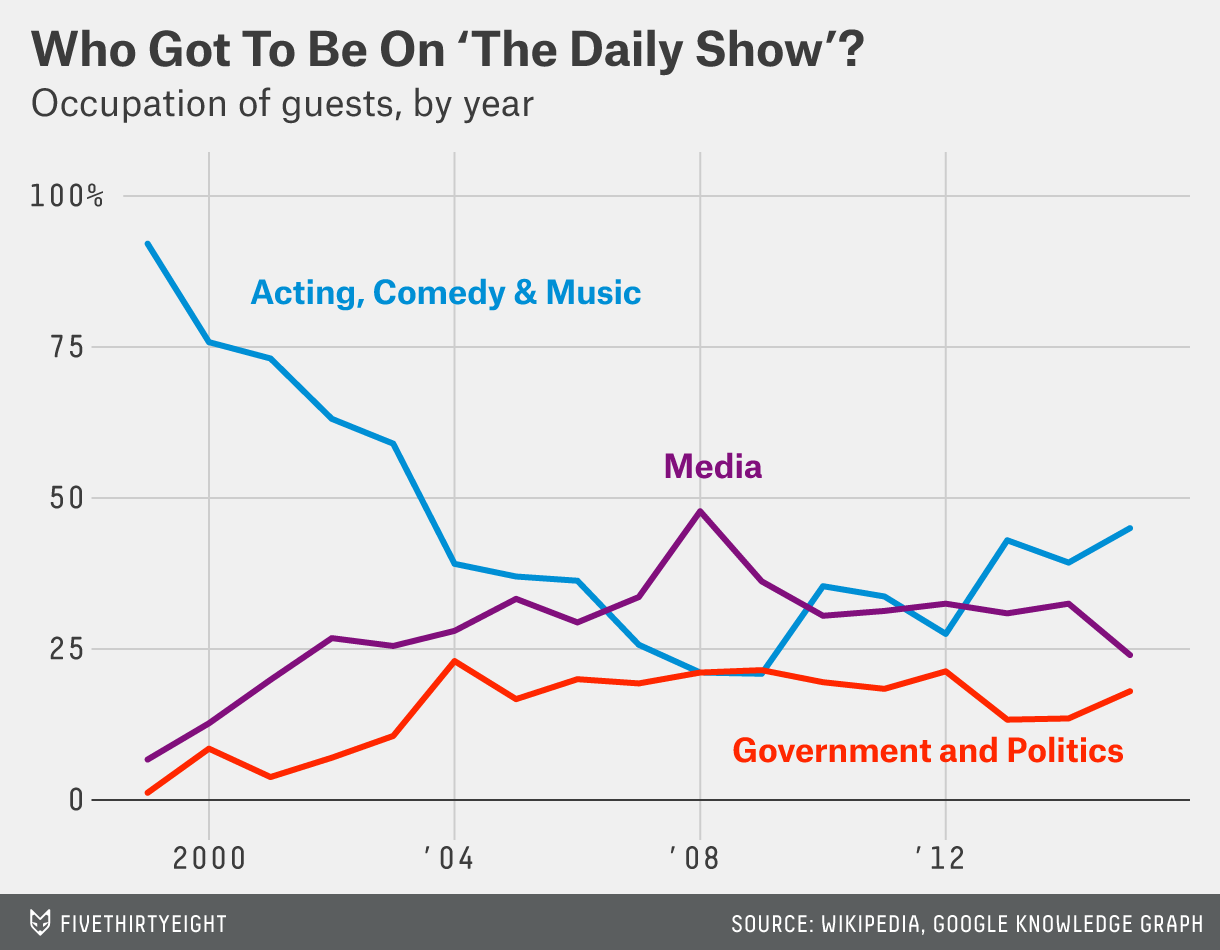

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [136]:
# Melt crosstab for ease of visualization. Resetting the index makes the 
# 'Occupation' column available to the melt.

melted = pd.melt(ct[:3].reset_index(), id_vars = ['Occupation'])
melted.head()

,Occupation,Year,value
0,"Acting, Comedy & Music",1999,90.36
1,Government and Politics,1999,1.20
2,Media,1999,6.63
3,"Acting, Comedy & Music",2000,73.96
4,Government and Politics,2000,8.28


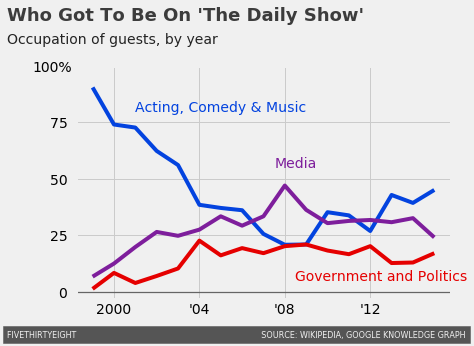

In [138]:
# Set style and color options.
plt.style.use('fivethirtyeight')
palette = sns.xkcd_palette(['blue', 'red', 'purple'])
sns.set_palette(palette)

# Generate the lineplot.
ax = sns.lineplot(x='Year', y='value', hue='Occupation', data=melted)

# Title, subtitle, and legend
ax.text(x=1995, y=120, s='Who Got To Be On \'The Daily Show\'',
        fontsize=18, weight='bold', alpha=0.75)
ax.text(x=1995, y=110,
        s='Occupation of guests, by year',
        fontsize=14, alpha=0.85)
ax.get_legend().remove()

# Horizontal axis
ax.set_xlabel('')
ax.set_xticks(np.linspace(2000, 2012, 4))
ax.set_xticklabels(labels=['2000', '\'04', '\'08', '\'12'])
ax.axhline(y=0, color ='black', linewidth=1.3, alpha=0.5)

# Vertical axis
ax.set_ylabel('')
ax.set_yticks(np.linspace(0, 100, 5))
ax.set_yticklabels(labels = ['0 ', '25 ', '50 ', '75 ', '100%'])

# Line labels
ax.text(x=2001, y=80, color=palette[0], s=melted['Occupation'][0])
ax.text(x=2008.5, y=5, color=palette[1], s=melted['Occupation'][1])
ax.text(x=2007.5, y=55, color=palette[2], s=melted['Occupation'][2])

# Footer
ax.text(x=1995, y=-20, 
        s='FIVETHIRTYEIGHT                                                   '
        '                       SOURCE: WIKIPEDIA, GOOGLE KNOWLEDGE GRAPH', 
        fontsize=8, color='#f0f0f0', backgroundcolor='#555555');

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)